# Build machine learning-based network intrusion detection system

This code aims to develop a Machine Learning-based Network Intrusion Detection System (NDIS) capable of detecting various attacks within a network by analyzing packet data.

## 1. Importing the dataset

In [23]:
import pandas as pd

RANDOM_STATE = 2024

# import the dataset
df = pd.read_csv('UNSW-NB15.csv')

print(df.shape)

# print a random set of 10 records
df.sample(n=10, random_state=RANDOM_STATE)

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
5052,5053,0.000004,unas,-,INT,2,0,200,0,2.500000e+05,...,3,4,0,0,0,3,4,0,Fuzzers,1
59093,59094,0.000001,udp,dns,INT,2,0,114,0,1.000000e+06,...,4,4,0,0,0,4,4,0,Generic,1
43952,43953,0.902279,tcp,-,FIN,10,8,574,354,1.884118e+01,...,1,1,0,0,0,2,4,0,Fuzzers,1
59505,59506,0.000003,udp,-,INT,2,0,104,0,3.333333e+05,...,1,1,0,0,0,1,6,0,Fuzzers,1
53067,53068,0.866460,tcp,-,FIN,8,6,632,268,1.500358e+01,...,1,1,0,0,0,2,4,0,Fuzzers,1
74277,74278,0.000011,udp,-,INT,2,0,1406,0,9.090909e+04,...,1,6,0,0,0,3,6,0,Normal,0
47909,47910,0.140604,udp,-,CON,2,2,1216,684,2.133652e+01,...,1,1,0,0,0,1,3,0,Generic,1
17405,17406,0.000008,udp,dns,INT,2,0,114,0,1.250000e+05,...,21,38,0,0,0,38,38,0,Generic,1
77236,77237,0.745645,tcp,-,FIN,16,10,1538,556,3.352802e+01,...,1,5,0,0,0,1,6,0,Normal,0
11946,11947,0.000009,udp,dns,INT,2,0,114,0,1.111111e+05,...,11,36,0,0,0,17,36,0,Generic,1


## 2. Data Cleaning & Preprocessing

Usually data preprocessing steps include

- Drop non-required features.
- Remove duplicate records.
- Remove irrelevant and redundant features.
- Drop columns that have constant values.
- Address outliers and unusual values.
- Handle missing values within the dataset.
- Reduce the number of nominal features values.


### 2.1. Remove duplicate

In [24]:
df.duplicated().sum()

0

In [25]:
df.drop(columns=['id'], inplace=True)

In [26]:
df.duplicated().sum()

26387

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df = df.sample(5000, random_state=RANDOM_STATE)
df.reset_index(inplace=True)
df

,index,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,26532,0.004501,tcp,-,FIN,22,14,1470,1728,7776.049686,...,1,3,0,0,0,12,15,0,Normal,0
1,32556,0.019622,tcp,-,FIN,16,18,1540,1644,1681.785756,...,1,6,0,0,0,8,16,0,Normal,0
2,37615,0.001145,udp,dns,CON,2,2,146,178,2620.087365,...,1,1,0,0,0,8,4,0,Normal,0
3,10222,0.540425,tcp,http,FIN,10,6,860,268,27.755933,...,1,1,0,0,1,1,1,0,Reconnaissance,1
4,6583,0.623040,tcp,http,FIN,10,6,840,268,24.075500,...,1,1,0,0,1,2,1,0,Exploits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,81064,1.198161,tcp,http,FIN,10,8,824,1078,14.188410,...,1,4,0,0,1,1,4,0,Normal,0
4996,14647,0.000002,udp,dns,INT,2,0,114,0,500000.001300,...,11,35,0,0,0,15,35,0,Generic,1
4997,3106,0.000005,ddx,-,INT,2,0,200,0,200000.005100,...,1,3,0,0,0,10,3,0,DoS,1
4998,33489,0.001052,udp,dns,CON,2,2,132,164,2851.711087,...,1,1,0,0,0,9,2,0,Normal,0


In [29]:
df.drop(columns=['index'], inplace=True)

### 2.2. Address missing values

In [30]:
df.isnull().sum().sort_values(ascending=False)

dur                  0
proto                0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
tcprtt               0
dwin                 0
dtcpb                0
dttl                 0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
sload                0
stcpb                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
label      

In [31]:
df.describe(include='all')

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,5000.000000,5000,5000,5000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000,5000.000000
unique,NaN,85,13,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,3653,3309,3378,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3043,NaN
mean,0.994491,NaN,NaN,NaN,23.538200,26.065000,8.005953e+03,2.067798e+04,4.072740e+04,154.280600,...,1.572200,3.871600,0.008800,0.009000,0.156400,3.817200,5.43980,0.005800,NaN,0.391400
std,3.736927,NaN,NaN,NaN,84.690901,108.078618,9.629067e+04,1.424733e+05,1.175408e+05,106.527252,...,2.669272,6.630709,0.093404,0.096545,0.523444,4.883498,6.84115,0.075944,NaN,0.488112
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,4.600000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,NaN,0.000000
25%,0.001144,NaN,NaN,NaN,2.000000,2.000000,4.860000e+02,1.620000e+02,2.445266e+01,31.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,NaN,0.000000
50%,0.362108,NaN,NaN,NaN,10.000000,8.000000,8.520000e+02,3.540000e+02,6.779339e+01,254.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.00000,0.000000,NaN,0.000000
75%,0.930165,NaN,NaN,NaN,16.000000,16.000000,2.067500e+03,1.728000e+03,4.055047e+03,254.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,6.00000,0.000000,NaN,1.000000


In [32]:
df.replace({'service': '-'}, 'none', inplace=True)
df.describe(include='all')

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,5000.000000,5000,5000,5000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000,5000.000000
unique,NaN,85,13,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,tcp,none,FIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,3653,3309,3378,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3043,NaN
mean,0.994491,NaN,NaN,NaN,23.538200,26.065000,8.005953e+03,2.067798e+04,4.072740e+04,154.280600,...,1.572200,3.871600,0.008800,0.009000,0.156400,3.817200,5.43980,0.005800,NaN,0.391400
std,3.736927,NaN,NaN,NaN,84.690901,108.078618,9.629067e+04,1.424733e+05,1.175408e+05,106.527252,...,2.669272,6.630709,0.093404,0.096545,0.523444,4.883498,6.84115,0.075944,NaN,0.488112
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,4.600000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,NaN,0.000000
25%,0.001144,NaN,NaN,NaN,2.000000,2.000000,4.860000e+02,1.620000e+02,2.445266e+01,31.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,NaN,0.000000
50%,0.362108,NaN,NaN,NaN,10.000000,8.000000,8.520000e+02,3.540000e+02,6.779339e+01,254.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.00000,0.000000,NaN,0.000000
75%,0.930165,NaN,NaN,NaN,16.000000,16.000000,2.067500e+03,1.728000e+03,4.055047e+03,254.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,6.00000,0.000000,NaN,1.000000


### 2.3. Cluster nominal features

In [33]:
proto_values = df['proto'].value_counts()
proto_values

proto
tcp     3653
udp     1113
unas      72
arp       29
ospf      13
        ... 
ip         1
smp        1
sps        1
igp        1
rdp        1
Name: count, Length: 85, dtype: int64

In [34]:
service_values = proto_values.where(proto_values > 10).dropna().index.to_list()
service_values

['tcp', 'udp', 'unas', 'arp', 'ospf']

In [35]:
import numpy as np
df['proto'] = np.where(df['proto'].isin(service_values), df['proto'], 'other')
df['proto'].value_counts()

proto
tcp      3653
udp      1113
other     120
unas       72
arp        29
ospf       13
Name: count, dtype: int64

## 3. Data Exploration & Visualisation

In [36]:
target_values = df.label.value_counts()
target_values

label
0    3043
1    1957
Name: count, dtype: int64

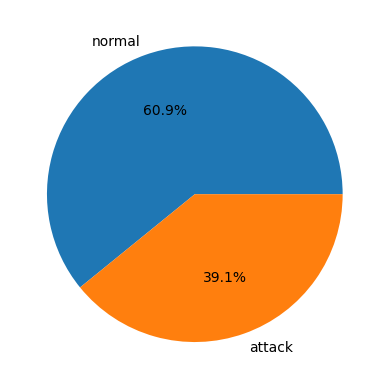

In [37]:
import matplotlib.pyplot as plt

plt.pie(target_values, labels=['normal', 'attack'], autopct='%0.1f%%')
plt.show()

In [38]:
attacks_cat = df['attack_cat'].where(df['attack_cat'] != 'Normal').dropna()
attacks_cat_count = attacks_cat.value_counts()
attacks_cat_count

attack_cat
Exploits          692
Fuzzers           427
Generic           303
Reconnaissance    274
DoS               157
Analysis           35
Shellcode          34
Backdoor           28
Worms               7
Name: count, dtype: int64

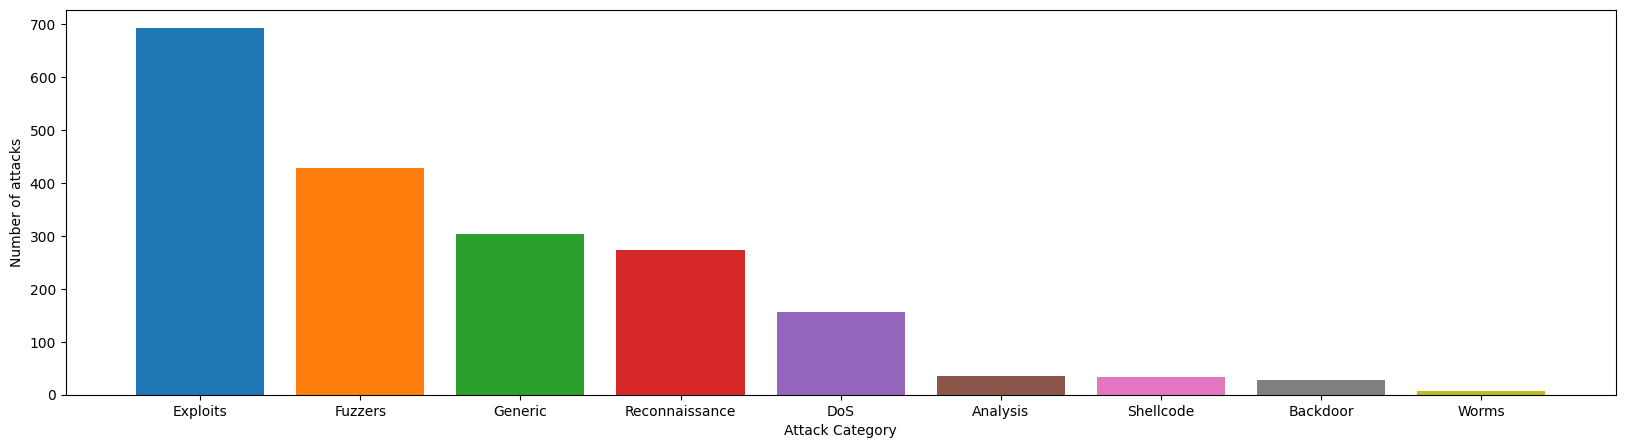

In [39]:
import matplotlib.colors as mcolors
att_cat_labels = attacks_cat_count.index
plt.figure(figsize=(20,5))
plt.bar(att_cat_labels, attacks_cat_count, label=att_cat_labels, color=mcolors.TABLEAU_COLORS)
plt.ylabel('Number of attacks')
plt.xlabel('Attack Category')
plt.show()

In [40]:
df.drop(columns='attack_cat', inplace=True)

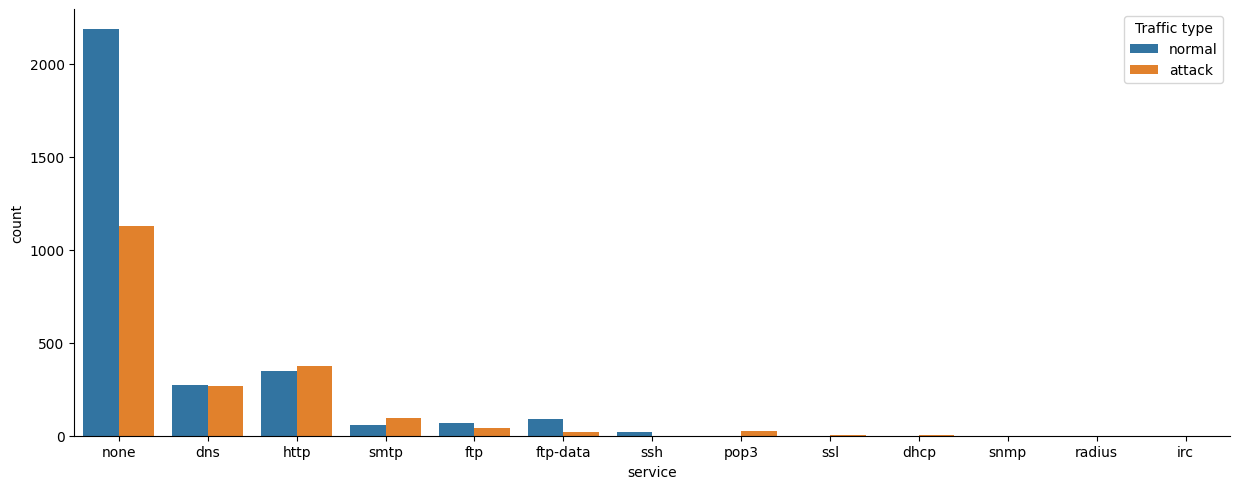

In [41]:
import seaborn as sns
sns.catplot(data=df, x='service', hue='label', kind='count', height=5, aspect=2.5, legend=False)
plt.legend(['normal', 'attack'], loc='best', title = 'Traffic type')
plt.show()

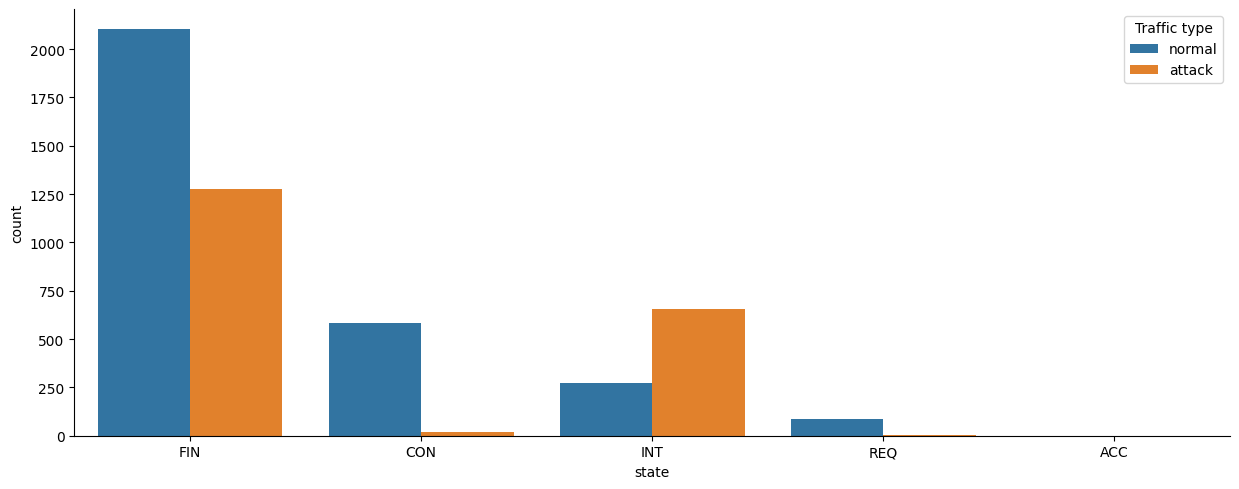

In [42]:
sns.catplot(data=df, x='state', hue='label', kind='count', height=5, aspect=2.5, legend=False)
plt.legend(['normal', 'attack'], loc='best', title = 'Traffic type')
plt.show()

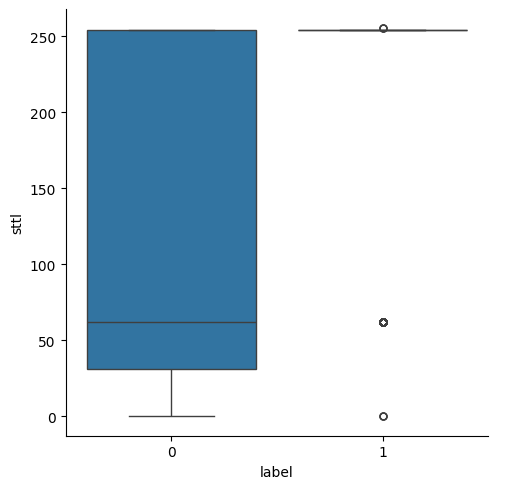

In [43]:
sns.catplot(data=df, x='label', y='sttl', kind='box')
plt.show()

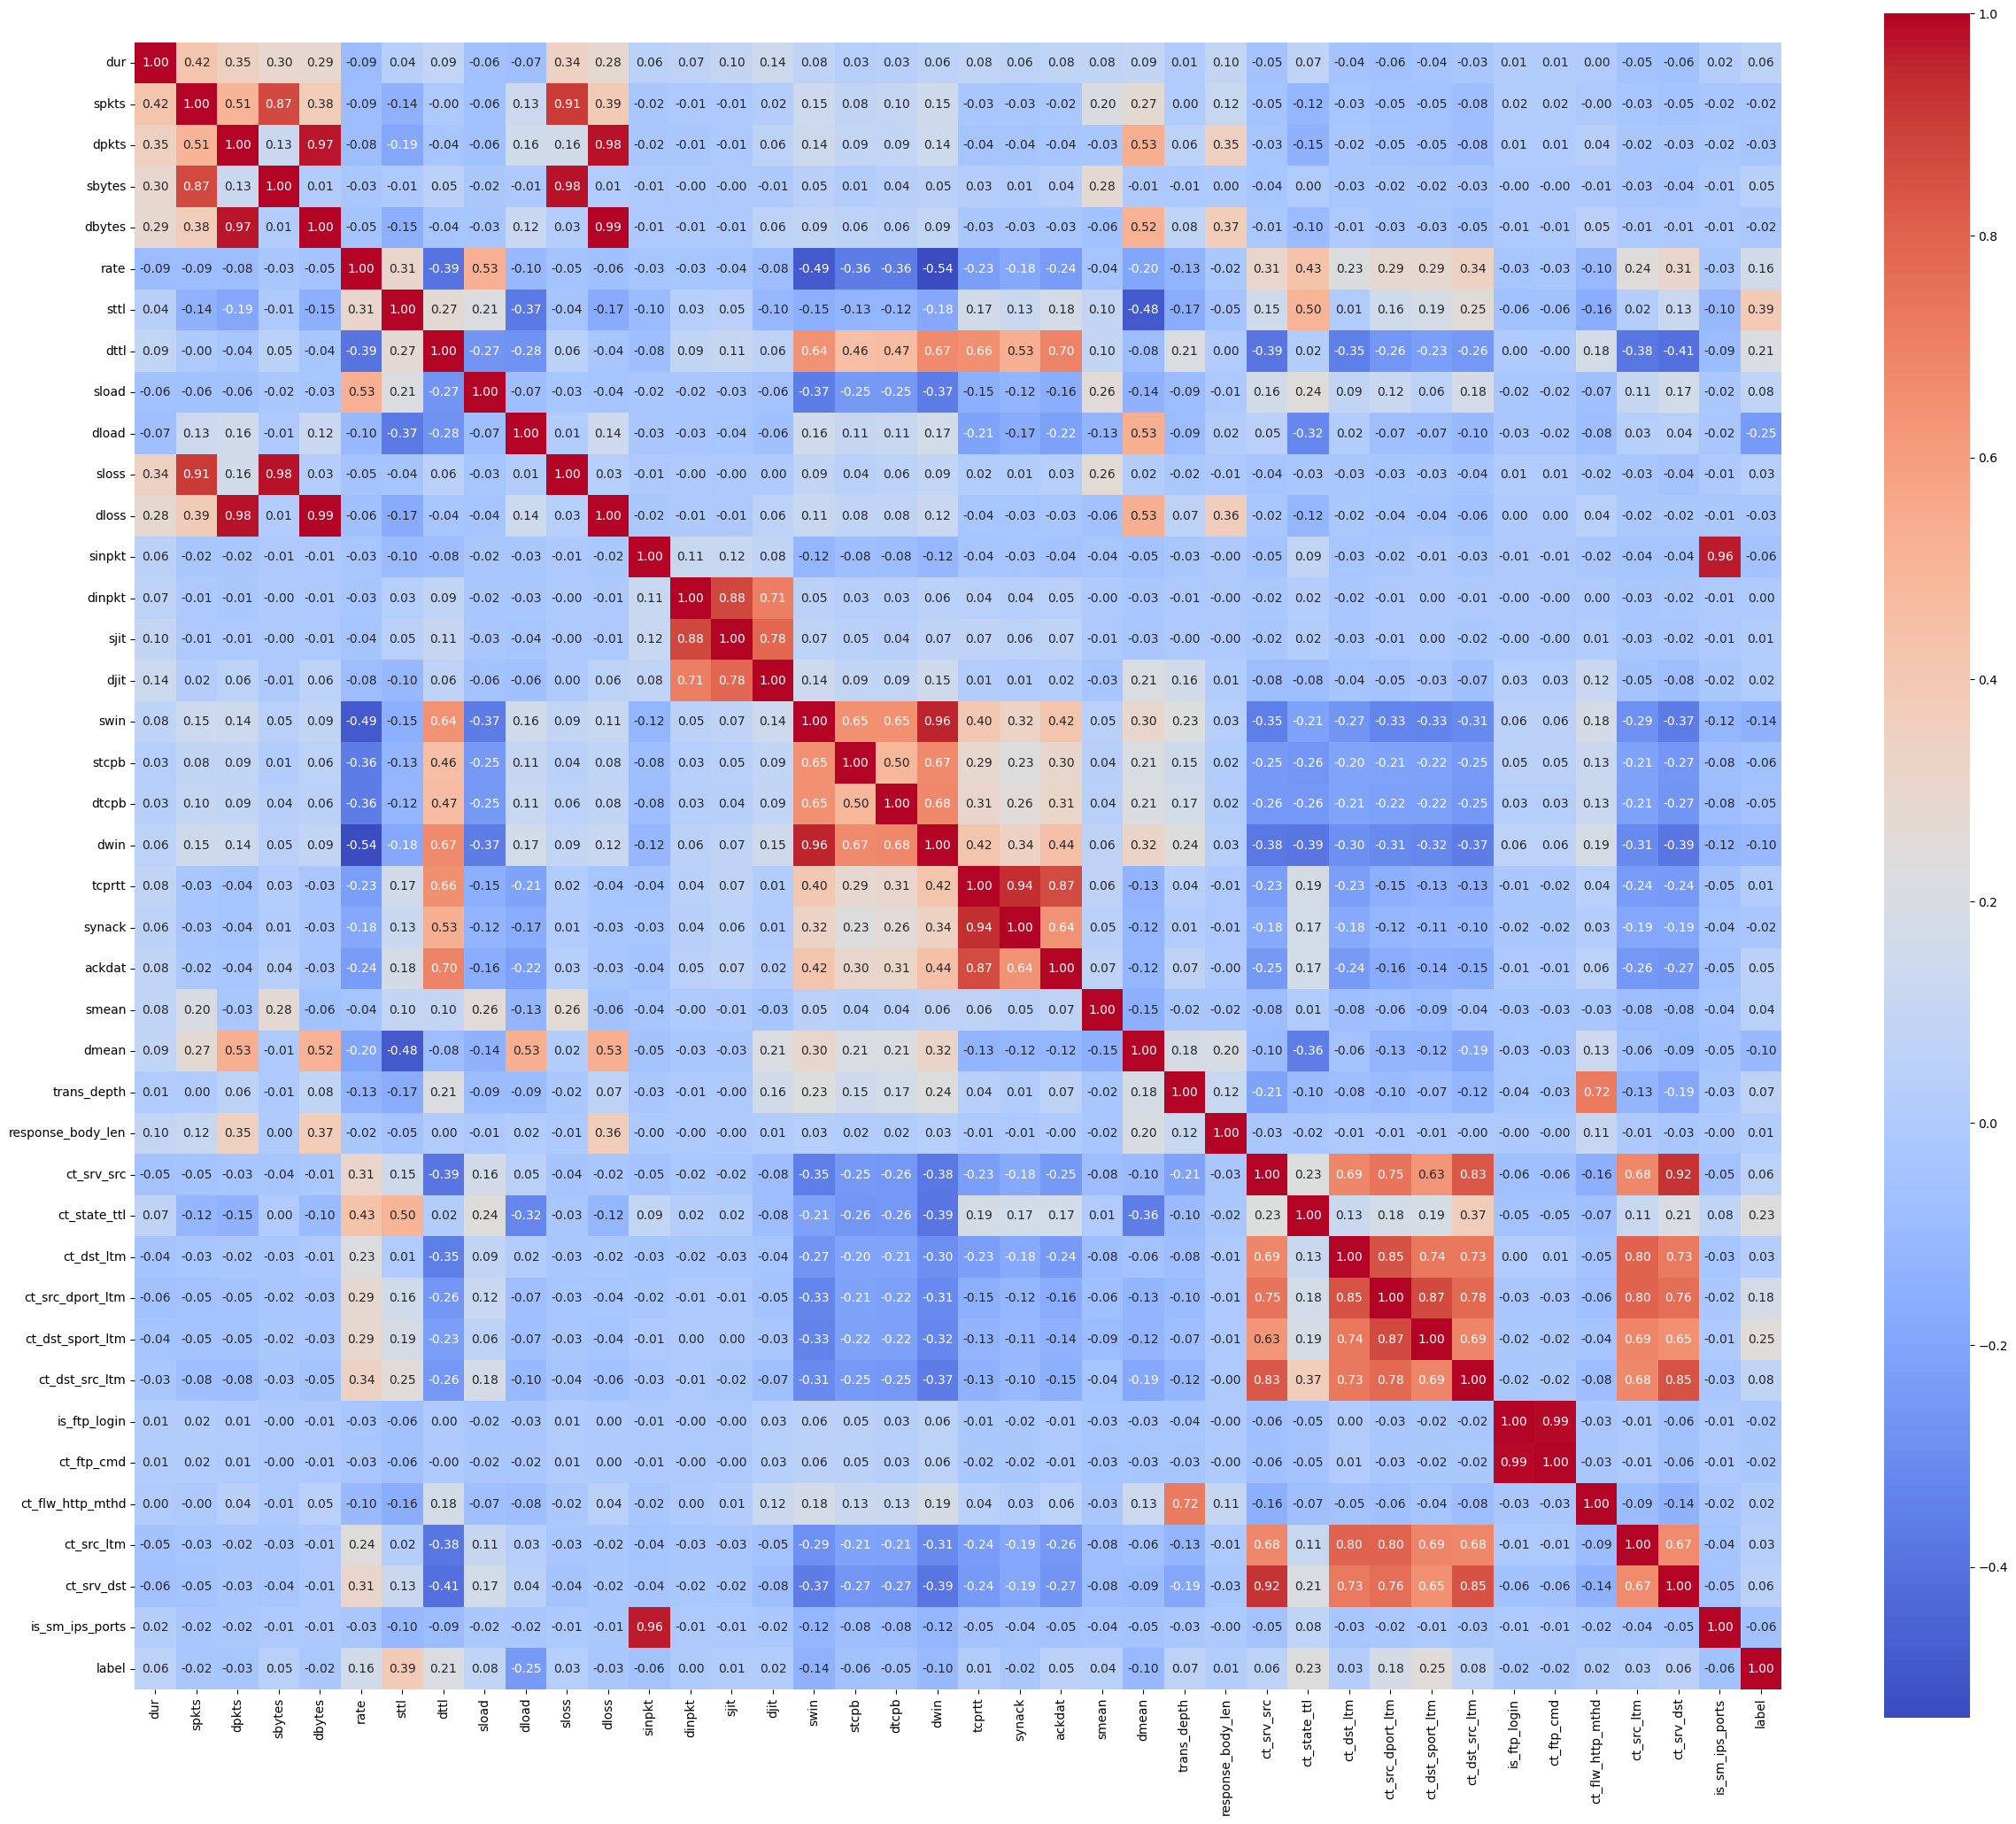

In [44]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, annot=True, fmt='.2f')
plt.show()

In [45]:
# define and drop the redundant features
redundant_features = ['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'ct_srv_dst', 'is_ftp_login']
df.drop(redundant_features, axis=1, inplace=True)

## 4. Extra preproccessing

### 4.1. One-Hot Encoding

In [46]:
nominal_features = df.select_dtypes(include=[object]).columns
df[nominal_features].nunique()

proto       6
service    13
state       5
dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder
nominal_data = df[nominal_features]
oh_encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

ohe_df = pd.DataFrame(oh_encoder.fit_transform(nominal_data).toarray())
ohe_df.columns = oh_encoder.get_feature_names_out()


df = df.join(ohe_df)
df.drop(columns=nominal_features, inplace=True)
df.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ
0,0.004501,22,14,7776.049686,31,29,2.495446e+06,2.852699e+06,0.214333,0.294462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.019622,16,18,1681.785756,31,29,5.887269e+05,6.331669e+05,1.286800,1.122882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001145,2,2,2620.087365,31,29,5.100437e+05,6.218341e+05,0.012000,0.008000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.540425,10,6,27.755933,254,252,1.145765e+04,3.315909e+03,54.652667,95.629203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.623040,10,6,24.075500,254,252,9.707241e+03,2.876220e+03,65.242111,112.791602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 4.2. Scaling the data

In [48]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
normalized_data = mm_scaler.fit_transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)
df.describe()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.016576,0.005456,0.008333,0.040727,0.605022,0.530801,0.008348,0.045943,7.448055e-03,2.020891e-03,...,0.000200,0.030200,0.000200,0.004200,0.000800,0.000200,0.120200,0.675600,0.186000,0.018000
std,0.062287,0.020501,0.034552,0.117541,0.417754,0.465585,0.035576,0.141478,7.585327e-02,2.131865e-02,...,0.014142,0.171154,0.014142,0.064678,0.028276,0.014142,0.325228,0.468197,0.389146,0.132964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000019,0.000242,0.000639,0.000024,0.121569,0.114625,0.000002,0.000069,6.458185e-07,1.212347e-07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006036,0.002179,0.002558,0.000068,0.996078,0.237154,0.000008,0.000260,4.285445e-04,3.241504e-04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.015504,0.003631,0.005115,0.004055,0.996078,0.996047,0.000239,0.008123,1.288704e-03,1.490014e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Features selection

In [49]:
target = df.label.astype(bool)
features = df.drop(columns='label')

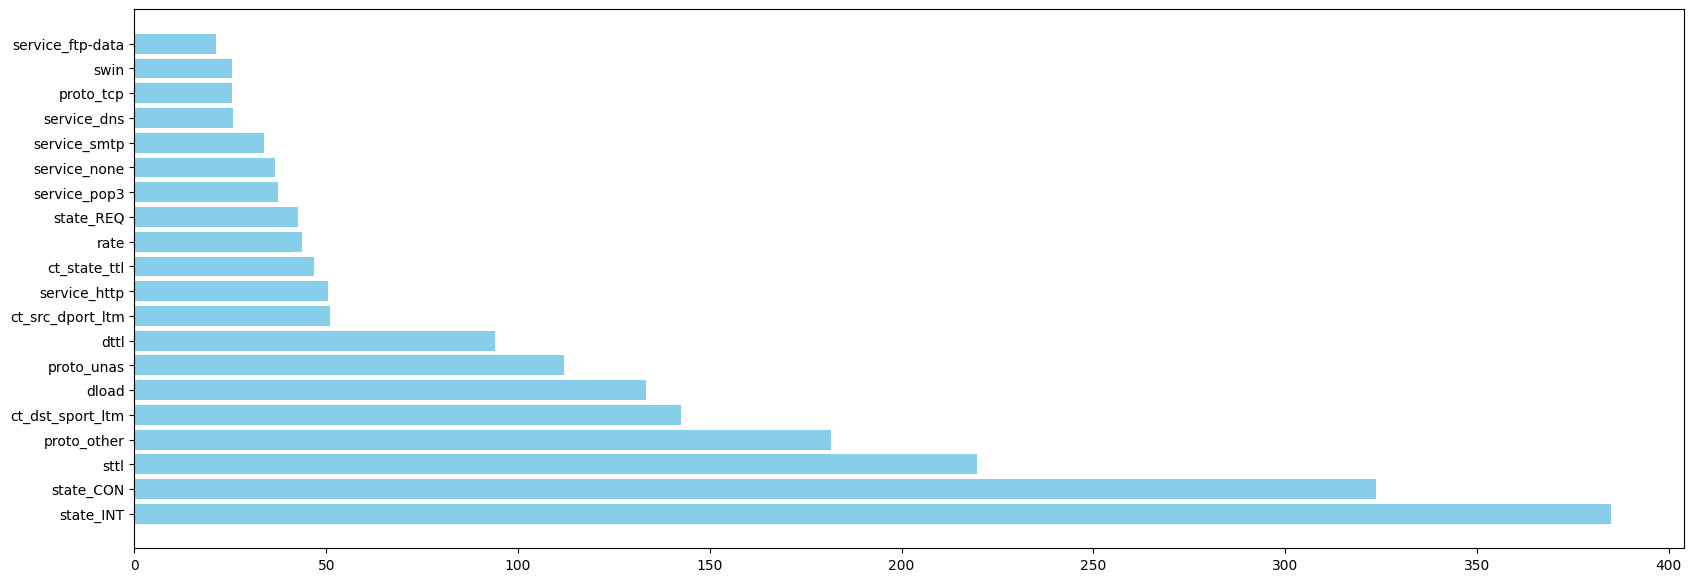

In [50]:
from sklearn.feature_selection import SelectKBest, chi2
FEATURES_NUM=20
fs_fit = SelectKBest(chi2, k=FEATURES_NUM)
fs_fit.fit_transform(features, target)
top_feature_indices = np.argsort(fs_fit.scores_)[::-1][0:FEATURES_NUM]
top_feature_scores = fs_fit.scores_[top_feature_indices]
choosen_features = features.iloc[:,top_feature_indices]

plt.figure(figsize=(20, 7))
plt.barh(choosen_features.columns , top_feature_scores, color='skyblue')
plt.show()

In [51]:
features = features[choosen_features.columns.to_list()]
features

,state_INT,state_CON,sttl,proto_other,ct_dst_sport_ltm,dload,proto_unas,dttl,ct_src_dport_ltm,service_http,ct_state_ttl,rate,state_REQ,service_pop3,service_none,service_smtp,service_dns,proto_tcp,swin,service_ftp-data
0,0.0,0.0,0.121569,0.0,0.00000,0.141903,0.0,0.114625,0.000000,0.0,0.000000,0.007776,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.121569,0.0,0.00000,0.031496,0.0,0.114625,0.113636,0.0,0.000000,0.001682,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.121569,0.0,0.00000,0.030932,0.0,0.114625,0.022727,0.0,0.000000,0.002620,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.996078,0.0,0.00000,0.000165,0.0,0.996047,0.000000,1.0,0.166667,0.000028,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.996078,0.0,0.00000,0.000143,0.0,0.996047,0.000000,1.0,0.166667,0.000024,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.243137,0.0,0.00000,0.000314,0.0,0.996047,0.000000,1.0,0.166667,0.000014,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4996,1.0,0.0,0.996078,0.0,0.37037,0.000000,0.0,0.000000,0.318182,0.0,0.333333,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4997,1.0,0.0,0.996078,1.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.200000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,1.0,0.121569,0.0,0.00000,0.031019,0.0,0.114625,0.000000,0.0,0.000000,0.002852,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 6. Model Training and Fine-tuning

### 6.1. Tune KNN model

In [52]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_STATE,
                                                    stratify=target)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

cv_method = StratifiedKFold(n_splits=10)
knn_params = {'n_neighbors': range(1,10), 'p': [1, 2, 5]}
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params, cv=cv_method, scoring='accuracy')
gs.fit(features_train, target_train)
gs.best_params_

{'n_neighbors': 6, 'p': 2}

In [54]:
gs.cv_results_['mean_test_score'].tolist()

[0.8262499999999999,
 0.8255000000000001,
 0.8254999999999999,
 0.8387499999999999,
 0.83725,
 0.8364999999999998,
 0.8324999999999999,
 0.8299999999999998,
 0.8322499999999999,
 0.8407500000000001,
 0.8402499999999999,
 0.8397499999999999,
 0.8397499999999999,
 0.8407500000000001,
 0.841,
 0.8404999999999999,
 0.84475,
 0.8432499999999999,
 0.83575,
 0.837,
 0.8375,
 0.8387499999999999,
 0.8397499999999999,
 0.83925,
 0.83775,
 0.8394999999999999,
 0.8377500000000001]

In [55]:
knn_tune_df = pd.DataFrame(gs.cv_results_['params'])
knn_tune_df['accuracy'] = gs.cv_results_['mean_test_score']
knn_tune_df

,n_neighbors,p,accuracy
0,1,1,0.82625
1,1,2,0.82550
2,1,5,0.82550
3,2,1,0.83875
4,2,2,0.83725
5,2,5,0.83650
6,3,1,0.83250
7,3,2,0.83000
8,3,5,0.83225
9,4,1,0.84075


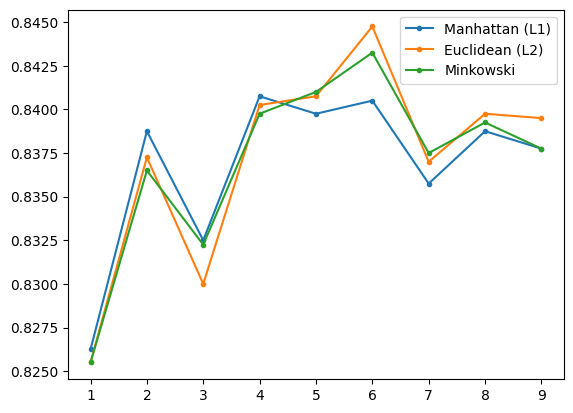

In [56]:
for knn_power in knn_params['p']:
  sub_result = knn_tune_df[knn_tune_df['p'] == knn_power]
  plt.plot(sub_result['n_neighbors'], sub_result['accuracy'], marker = '.', label = knn_power)
plt.legend(['Manhattan (L1)', 'Euclidean (L2)', 'Minkowski'])
plt.show()

### 6.2. Train KNN model

In [57]:
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=6, p=2)
knn_model.fit(features_train, target_train)
knn_pred_result = knn_model.predict(features_test)
knn_accuracy = accuracy_score(target_test, knn_pred_result)
knn_accuracy

0.851

### 6.3 Tune and Train Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

cv_method = StratifiedKFold(n_splits=10)
rf_params = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [1, 2, 3, 5, 8, 13, 21, 34]}
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=RANDOM_STATE), param_grid=rf_params, cv=cv_method, scoring='accuracy')
gs.fit(features_train, target_train)
gs.best_params_

{'criterion': 'gini', 'max_depth': 13}

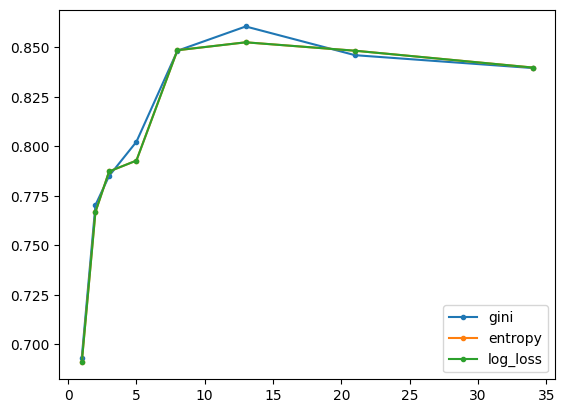

In [59]:
rf_tune_df = pd.DataFrame(gs.cv_results_['params'])
rf_tune_df['accuracy'] = gs.cv_results_['mean_test_score']
for criterion in rf_params['criterion']:
  sub_result = rf_tune_df[rf_tune_df['criterion'] == criterion]
  plt.plot(sub_result['max_depth'], sub_result['accuracy'], marker = '.', label = knn_power)
plt.legend(['gini', 'entropy', 'log_loss'])
plt.show()

In [60]:
rf_model = RandomForestClassifier(criterion='gini', max_depth=13, random_state=RANDOM_STATE)
rf_model.fit(features_train, target_train)
rf_pred_result = rf_model.predict(features_test)
rf_accuracy = accuracy_score(target_test, rf_pred_result)
rf_accuracy

0.837

### 6.4. Neural Network

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import Input
from tensorflow.keras.optimizers import Nadam

optimizer = Nadam(learning_rate=0.005)

nn_model = Sequential()
# add input layer
nn_model.add(Input(shape=(features.shape[1],)))
# add hidden layers
nn_model.add(Dense(15, activation='leaky_relu'))
nn_model.add(Dense(5, activation='leaky_relu'))
# add output layer
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer=optimizer)

nn_model.fit(features_train, target_train, epochs=200, batch_size=35, verbose=0)

nn_pred_result = nn_model.predict(features_test, verbose=0)
nn_pred_result = np.where(nn_pred_result < 0.5, 0, 1)
nn_accuracy = accuracy_score(target_test, nn_pred_result)
nn_accuracy

0.818

## 7. Performance Evaluation

### 7.1 Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

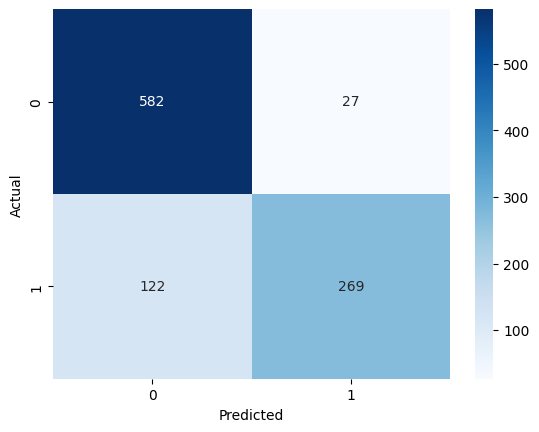

In [62]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target_test, knn_pred_result)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [63]:
from sklearn.metrics import recall_score
rf_recall = recall_score(target_test, knn_pred_result)
rf_recall

0.6879795396419437

In [64]:
from sklearn.metrics import precision_score
rf_prec = precision_score(target_test, knn_pred_result)
rf_prec

0.9087837837837838

### 7.2. ROC-AUC Curve

Receiver-operating characteristic curve (ROC)

Area under the curve (AUC)

In [65]:
from sklearn.metrics import roc_curve, auc
knn_pred_result_prob = knn_model.predict_proba(features_test)
knn_pred_result_prob

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ]])

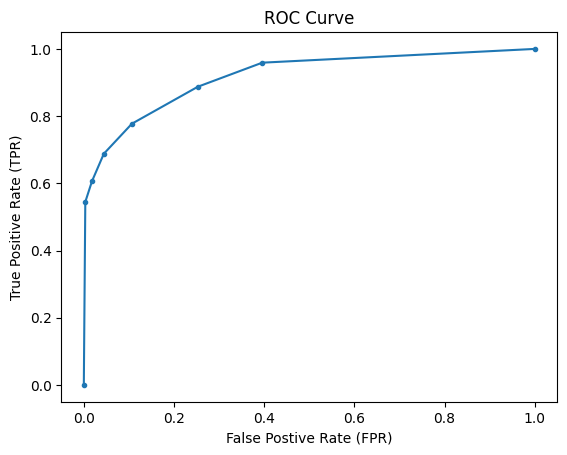

In [66]:
fpr, tpr, _ = roc_curve(target_test, knn_pred_result_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker = '.')
plt.title(f'ROC Curve')
plt.xlabel('False Postive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()